Link para o colab: https://colab.research.google.com/drive/1AVBtwqVYKUUyfiXXnWqGWXFmqR0zlQGY?usp=sharing

Link para o github: https://github.com/moukinchung/DataVis

In [96]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1H4LtrA2xLlUenm73rKwCwnzrcMB_c1fN"})
downloaded.GetContentFile('vendas.csv')

In [97]:
import pandas as pd

data = pd.read_csv('vendas.csv',encoding='iso-8859-1') #enconding com utf-8 (default) nao funciona
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Q1 - CSV de Sales X Profit segmentado por Region, destacando a media de Discount aplicado.

In [98]:
questao1 = data.groupby(['Region']).aggregate({'Sales':'sum','Profit':'sum','Discount':'mean'})
questao1.head()

,Sales,Profit,Discount
Region,,,
Central,501239.8908,39706.3625,0.240353
East,678781.2400,91522.7800,0.145365
South,391721.9050,46749.4303,0.147253
West,725457.8245,108418.4489,0.109335


In [99]:
questao1.to_csv('primeiroCSV.csv',sep=';')

Q2 - Gráfico de Profit acumulado por ano (Order Date) para cada uma das 
sub-categorias de produto (Sub-Category).

In [100]:
data['Ano'] = pd.to_datetime(data['Order Date']).dt.year
grafico = data.groupby(['Ano','Sub-Category']).aggregate({'Profit':'sum'})
grafico.head(5)

Profit
Ano  Sub-Category           
2014 Accessories   6402.7150
     Appliances    2459.4999
     Art           1406.8031
     Binders       4739.7160
     Bookcases     -346.1707

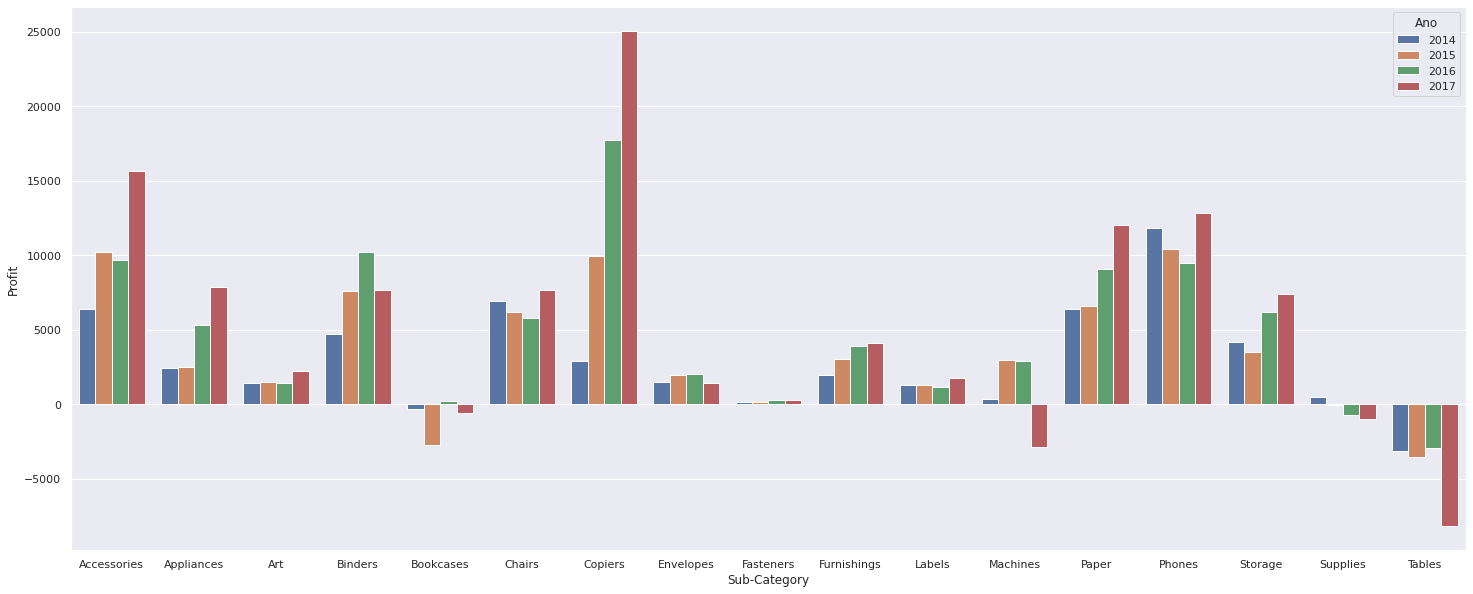

In [101]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x="Sub-Category", y='Profit', hue='Ano', data=grafico.reset_index())

Q3 - CSV com a quantidade de consumidores por
classe de performance das vendas e Segment do consumidor.

In [102]:
data['Perf'] = data['Profit']/(data['Sales']-data['Discount'])
data['Perf'].describe()

count    9994.000000
mean        0.096314
std         0.715747
min       -37.155556
25%         0.075018
50%         0.270000
75%         0.366666
max         3.873770
Name: Perf, dtype: float64

Removendo os valores fora dos critérios de referência.
(Caso seja válido a inclusão desses valores, esse passo não é necessário.)

In [103]:
dadosLimpos = data.drop(data[(data['Perf']<0) | (data['Perf']>1) | data['Perf'].isnull() ].index, inplace=False)
dadosLimpos['Perf'].describe()

count    8123.000000
mean        0.293005
std         0.142086
min         0.000000
25%         0.177864
50%         0.312519
75%         0.410000
max         0.500000
Name: Perf, dtype: float64

In [104]:
grupos = ['E', 'D', 'C', 'B', 'A']
dadosLimpos['Classe'] = pd.cut(dadosLimpos['Perf'], bins=[0, .1, .15, .2, .25, 1], labels=grupos, include_lowest=True)

In [105]:
questao3 = dadosLimpos.groupby(['Segment','Classe']).agg(total=pd.NamedAgg(column='Classe', aggfunc='count'))
questao3 = questao3.reset_index()
questao3 = questao3.pivot(index='Classe', columns='Segment', values='total')

In [106]:
questao3

Segment,Consumer,Corporate,Home Office
Classe,,,
E,577,339,176
D,393,213,114
C,186,114,66
B,212,124,95
A,2820,1674,1020


In [107]:
questao3.to_csv('segundoCSV.csv',sep=';')